# Lab 5 - Data Visualization

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [245]:
week_three = pd.read_csv('nfloffenseweek3.csv')
week_four = pd.read_csv('nfloffenseweek4.csv')
week_five = pd.read_csv('nfloffenseweek5.csv')
week_three['week'] = 3
week_four['week'] = 4
week_five['week'] = 5
df = pd.concat((file for file in [week_three, week_four, week_five]))
df.reset_index(inplace=True)
df.drop('index',axis=1, inplace=True)
df = pd.merge(pd.read_csv('nfl_teams.csv'), df, left_on='Name', right_on='team')
df.columns

Index(['ID', 'Name', 'Abbreviation', 'Conference', 'Division', 'rank', 'team',
       'games', 'points_scored', 'total_yards', 'offensive_plays',
       'yards_per_play', 'turnovers_lost', 'fumbles_lost', '1st_downs',
       'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_1st_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_1st_downs', 'penalties', 'penalty_yards', '1st_down_penalties',
       'percentage_scoring_drives', 'percentage_turnover_drives',
       'expected_points', 'week'],
      dtype='object')

2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

<BarContainer object of 32 artists>

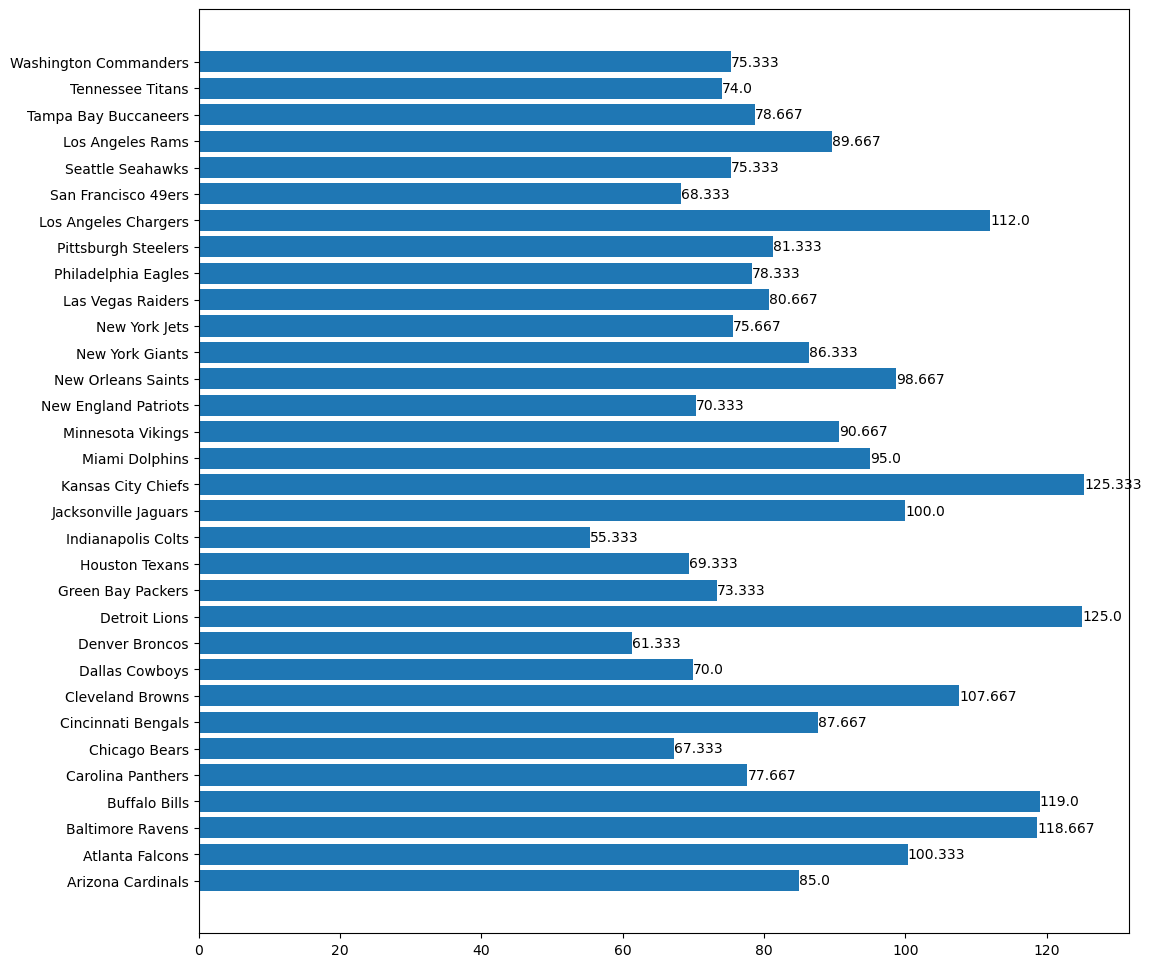

In [246]:
plt.figure(figsize=(12, 12))

#fig, ax = plt.subplots()
barhplot = plt.barh(df.team.unique(), df.groupby('team').points_scored.mean() )
plt.bar_label(barhplot, labels = df.groupby('team').points_scored.mean().round(3))
barhplot


3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

<BarContainer object of 32 artists>

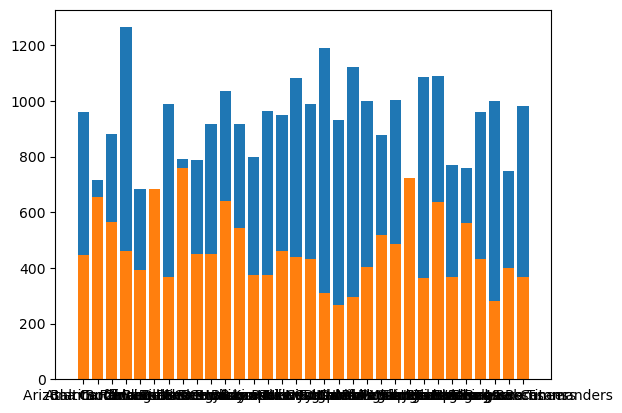

In [247]:
 
plt.bar(df.team.unique(), df.groupby('team').passing_yards.mean())
plt.bar(df.team.unique(), df.groupby('team').rushing_yards.mean())

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

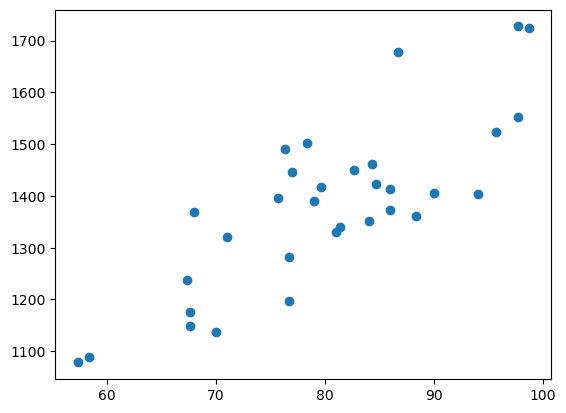

In [248]:
plt.scatter(df.groupby('team')['1st_downs'].mean(), df.groupby('team').total_yards.mean())

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

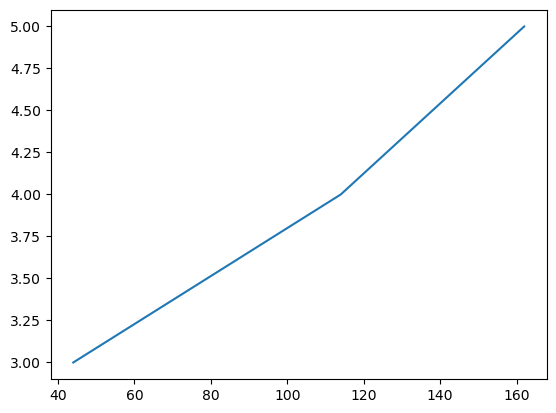

In [249]:
plt.plot(df[df.team == 'Baltimore Ravens'].penalty_yards, df.week.unique())

6. Plot the average total points vs average yards per play for each team as a bar chart (with total points on the y-axis and yards per play on the x-axis).

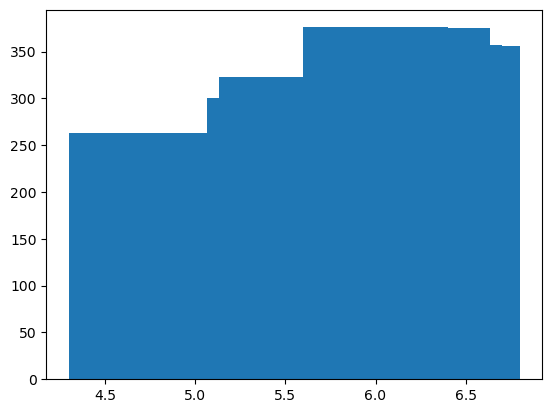

In [250]:
barplot = plt.bar(df.groupby('team').yards_per_play.mean(), df.groupby('team').points_scored.sum())

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

<BarContainer object of 12 artists>

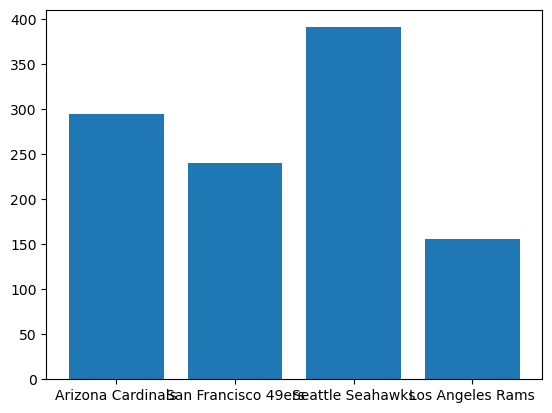

In [251]:
plt.bar(df[(df.Conference == 'NFC') & (df.Division == 'West')].team, df[(df.Conference == 'NFC') & (df.Division == 'West')].penalty_yards)

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

<BarContainer object of 8 artists>

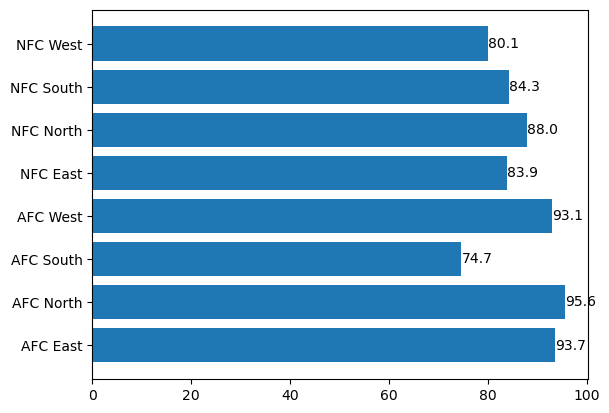

In [252]:
con_groups = df.groupby(['Conference', 'Division']).points_scored.mean()
con_names = [" ".join(i) for i in con_groups.keys().values]
con_graph = plt.barh(con_names, con_groups.values)
plt.bar_label(con_graph, labels = con_groups.values.round(1))
con_graph